In [4]:
## Loading Libraries
import pandas as pd
import altair as alt
import numpy as np
from datetime import datetime
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('data_server')

# Describe your dataset 


*  Lyft Bikes and Scooters, LLC (“Bikeshare”) operates New York City’s Citi Bike bicycle sharing service. Bikeshare is committed to supporting bicycling as an alternative transportation option. As part of that commitment, Bikeshare makes certain Citi Bike system data (“Data”) available to the public.
* This data contains bikers trip information such as bike trip duration, start/stop time and date, start/stop station name and location, user types, date of birth, and gender.
* The data was collected in 2017
* The purpose of our dataset is for learning.
* It looks like historical records digitized.

# Load the dataset

In [5]:
df = pd.read_csv("201701-citibike-tripdata.csv")
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


# Explore your dataset

In [6]:
df.describe()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,7.266760e+05,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,697600.000000,726676.000000
mean,7.778989e+02,1222.917630,40.737372,-73.984795,1197.252902,40.737077,-73.985133,21713.053902,1977.122481,1.166728
std,1.124683e+04,1277.955252,0.072596,0.123776,1266.085070,0.072474,0.123782,4199.313576,11.925020,0.475971
min,6.100000e+01,72.000000,0.000000,-74.031372,72.000000,0.000000,-74.033459,14529.000000,1885.000000,0.000000
25%,3.310000e+02,358.000000,40.720874,-73.995299,356.000000,40.720828,-73.995960,17859.000000,1969.000000,1.000000
50%,5.260000e+02,482.000000,40.739355,-73.987167,479.000000,40.739323,-73.987586,21295.000000,1979.000000,1.000000
75%,8.600000e+02,3092.000000,40.755103,-73.976682,3078.000000,40.755003,-73.976806,25803.000000,1987.000000,1.000000
max,5.325688e+06,3446.000000,40.804213,0.000000,3447.000000,40.804213,0.000000,27325.000000,2000.000000,2.000000


The maximum of the trip duration column seem like an outlier. It could be that the user forgot to return the bike to the station

In [7]:
# percentage of missing values
df.isna().sum()/len(df) * 100

Trip Duration              0.000000
Start Time                 0.000000
Stop Time                  0.000000
Start Station ID           0.000000
Start Station Name         0.000000
Start Station Latitude     0.000000
Start Station Longitude    0.000000
End Station ID             0.000000
End Station Name           0.000000
End Station Latitude       0.000000
End Station Longitude      0.000000
Bike ID                    0.000000
User Type                  0.439398
Birth Year                 4.001233
Gender                     0.000000
dtype: float64

There are only 4% of missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726676 entries, 0 to 726675
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            726676 non-null  int64  
 1   Start Time               726676 non-null  object 
 2   Stop Time                726676 non-null  object 
 3   Start Station ID         726676 non-null  int64  
 4   Start Station Name       726676 non-null  object 
 5   Start Station Latitude   726676 non-null  float64
 6   Start Station Longitude  726676 non-null  float64
 7   End Station ID           726676 non-null  int64  
 8   End Station Name         726676 non-null  object 
 9   End Station Latitude     726676 non-null  float64
 10  End Station Longitude    726676 non-null  float64
 11  Bike ID                  726676 non-null  int64  
 12  User Type                723483 non-null  object 
 13  Birth Year               697600 non-null  float64
 14  Gend

In [9]:
df["User Type"].value_counts()

Subscriber    700465
Customer       23018
Name: User Type, dtype: int64

In [10]:
df["Gender"].value_counts() ## 0 is unknown, 1 is men, 2 is women

1    541849
2    152992
0     31835
Name: Gender, dtype: int64

# Initial thoughts

* There seems to be an outlier in Trip Duration and Birth Year Column
* There are nan values in User Type and Birth Year columns in the dataset
* Unbalanced User Type and Gender Classes

# Wrangling

In [11]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [12]:
# drop missing values
df = df.dropna()
df.isna().sum()/len(df) * 100

Trip Duration              0.0
Start Time                 0.0
Stop Time                  0.0
Start Station ID           0.0
Start Station Name         0.0
Start Station Latitude     0.0
Start Station Longitude    0.0
End Station ID             0.0
End Station Name           0.0
End Station Latitude       0.0
End Station Longitude      0.0
Bike ID                    0.0
User Type                  0.0
Birth Year                 0.0
Gender                     0.0
dtype: float64

In [13]:
len(df)

694412

In [14]:
def day_part(x):
    if (x>=0) & (x<6):
        part = 'night'
    elif (x>=6) & (x<12):
        part = 'morning'
    elif (x>=12) & (x<18):
        part = 'afternoon'
    else:
        part = 'evening'
    return part


In [15]:
df["Start Time"]=pd.to_datetime(df["Start Time"])
df["Stop Time"]=pd.to_datetime(df["Stop Time"])
df["Age"]=2017-df["Birth Year"]
df['hour'] = df["Start Time"].dt.hour
df["Start weekday"] = df['Start Time'].dt.day_name()
df['day_part'] = df["Start Time"].dt.hour.map(day_part) 



In [16]:
# remove outliers
df = remove_outlier(df, "Trip Duration")
df = remove_outlier(df, "Age")

In [17]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,hour,Start weekday,day_part
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,52.0,0,Sunday,night
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,30.0,0,Sunday,night
5,666,2017-01-01 00:01:51,2017-01-01 00:12:57,3163,Central Park West & W 68 St,40.773407,-73.977825,3163,Central Park West & W 68 St,40.773407,-73.977825,16050,Subscriber,2000.0,1,17.0,0,Sunday,night
6,559,2017-01-01 00:05:00,2017-01-01 00:14:20,499,Broadway & W 60 St,40.769155,-73.981918,479,9 Ave & W 45 St,40.760193,-73.991255,27294,Subscriber,1973.0,1,44.0,0,Sunday,night
7,826,2017-01-01 00:05:37,2017-01-01 00:19:24,362,Broadway & W 37 St,40.751726,-73.987535,445,E 10 St & Avenue A,40.727408,-73.981420,23288,Subscriber,1977.0,2,40.0,0,Sunday,night


In [18]:
df['day of week type'] = df['Start weekday'].apply(lambda x: 'weekend' if (x == "Sunday") | (x == "Saturday") else 'weekday')

In [19]:
start_station_count = df.groupby('Start Station Name')["Start Station Name"].size().reset_index(name='count')
end_station_count = df.groupby('End Station Name')["End Station Name"].size().reset_index(name='count')
station_count = pd.merge(start_station_count, end_station_count,
                         left_on='Start Station Name', right_on='End Station Name')
station_count["sum count"] = station_count["count_x"]+station_count["count_y"]

In [20]:
station_count["sum count"] = pd.to_numeric(station_count["sum count"])
top10_station_count = station_count.nlargest(10,'sum count')

# Research Questions

- What is the most efficient travel route (no traffic) from a start station to an end station? This research question should be answerable with this dataset but requires additional data processing or wrangling that is outside the scope of this mini-project (requires plotting locations on a map)

- Does weather condition in certain weekdays or weekends have inflences on bike ride frenquencies? This research question should not answerable as we don't have the weather variable that describes whether it's sunny, cloudy, rainy or snowy.

# Data analysis & visualizations

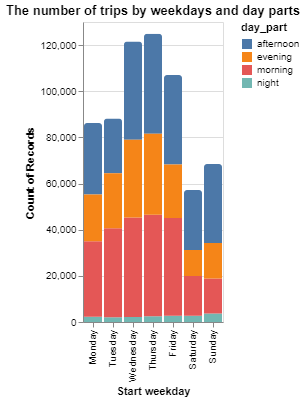

In [21]:
# number of user on each weekdays and divided into day parts.
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
alt.Chart(df,title='The number of trips by weekdays and day parts').mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X('Start weekday:O',sort=days),
    alt.Y("count()"),
    color='day_part:N'
)

Out of all the users in the weekends/weekdays, most of the users are travelling on the bike in the morning on the weekdays and in the afternoon on the weekends. 

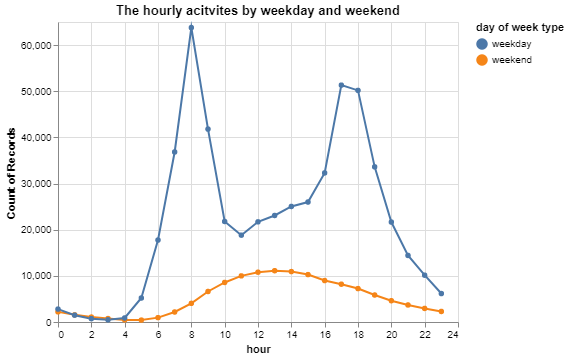

In [22]:
alt.Chart(df,title='The hourly acitvites by weekday and weekend').mark_line(point=True).encode(
    alt.X('hour', scale=alt.Scale(zero=False)),
    alt.Y('count()', scale=alt.Scale(zero=False)),
    order='hour',
    color= 'day of week type'
)

This plot shows that the users go to work at 8am and back from work at 6pm because there are obviously two peaks during the weekday. On the hand, bike users are normally distribution on the weekend.

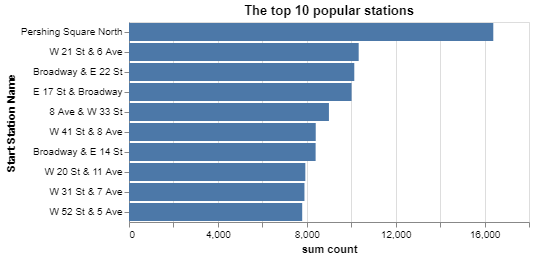

In [23]:
alt.Chart(top10_station_count, title="The top 10 popular stations").mark_bar().encode(
    alt.X('sum count:Q'),
    alt.Y('Start Station Name:O',sort='-x')
)

Pershing Square North is the most popular station

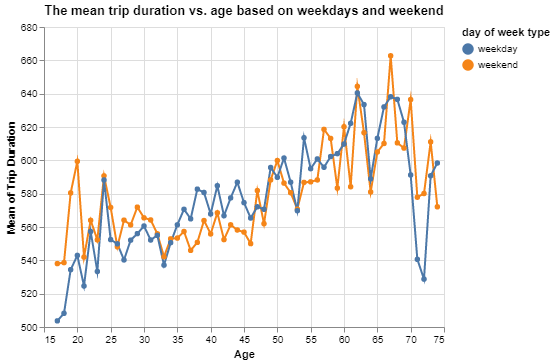

In [24]:
alt.Chart(df,title='The mean trip duration vs. age based on weekdays and weekend').mark_line(point=True).encode(
    alt.X('Age'),
    alt.Y('mean(Trip Duration)', scale=alt.Scale(zero=False)),
    color= 'day of week type:N'
)

The retirement age in the US is generally at 66 years, and we can also see from the above the chart that when the person cross 67, the mean duration falls drastically on weekdays because they don't need to ride for their jobs.

# Summary and conclusions

- There were initially outliers,nan values in the Dataset
- There were unbalanced classes/groups of User Type and Gender in the Dataset
- Out of all the users in the weekends/weekdays, most of the users are travelling on the bike in the morning on the weekdays and in the afternoon on the weekends
- Older Age Group people tend to use bike less on the weekdays especially after the retirement
- On the weekday, maximum bike usage is around 8 am in the morning and 6 pm in the evening